In [2]:
import os
import numpy as np
from scipy.io import wavfile
from scipy.signal import welch

# Especificar el directorio donde se encuentran los archivos .wav
directory = r'C:\Users\Usuario\Desktop\Audios Control\ANEaudios'

# Obtener la lista de archivos .wav en el directorio
wav_files = [f for f in os.listdir(directory) if f.endswith('.wav')]

# Inicializar una lista para almacenar los espectros de potencia
spectra = []

# Procesar cada archivo .wav
for wav_file in wav_files:
    # Leer el archivo .wav
    sample_rate, data = wavfile.read(os.path.join(directory, wav_file))
    
    # Si el archivo es estéreo, tomar solo un canal
    if len(data.shape) > 1:
        data = data[:, 0]
    
    # Calcular el espectro de potencia utilizando el método de Welch
    freqs, psd = welch(data, sample_rate)
    
    # Almacenar el espectro de potencia en la lista
    spectra.append((wav_file, freqs, psd))

# Convertir la lista a un array de numpy para un manejo más eficiente
spectra_array = np.array(spectra, dtype=object)

# Imprimir el array de espectros de potencia
print(spectra_array)


np.savetxt('spectra_array.csv', spectra_array, delimiter=',', fmt='%s')





[['100.0_0_.wav'
  array([    0.      ,   172.265625,   344.53125 ,   516.796875,
           689.0625  ,   861.328125,  1033.59375 ,  1205.859375,
          1378.125   ,  1550.390625,  1722.65625 ,  1894.921875,
          2067.1875  ,  2239.453125,  2411.71875 ,  2583.984375,
          2756.25    ,  2928.515625,  3100.78125 ,  3273.046875,
          3445.3125  ,  3617.578125,  3789.84375 ,  3962.109375,
          4134.375   ,  4306.640625,  4478.90625 ,  4651.171875,
          4823.4375  ,  4995.703125,  5167.96875 ,  5340.234375,
          5512.5     ,  5684.765625,  5857.03125 ,  6029.296875,
          6201.5625  ,  6373.828125,  6546.09375 ,  6718.359375,
          6890.625   ,  7062.890625,  7235.15625 ,  7407.421875,
          7579.6875  ,  7751.953125,  7924.21875 ,  8096.484375,
          8268.75    ,  8441.015625,  8613.28125 ,  8785.546875,
          8957.8125  ,  9130.078125,  9302.34375 ,  9474.609375,
          9646.875   ,  9819.140625,  9991.40625 , 10163.671875,
        

C:\Users\Usuario\AppData\Local\Temp\ipykernel_31588\3197865547.py:22: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


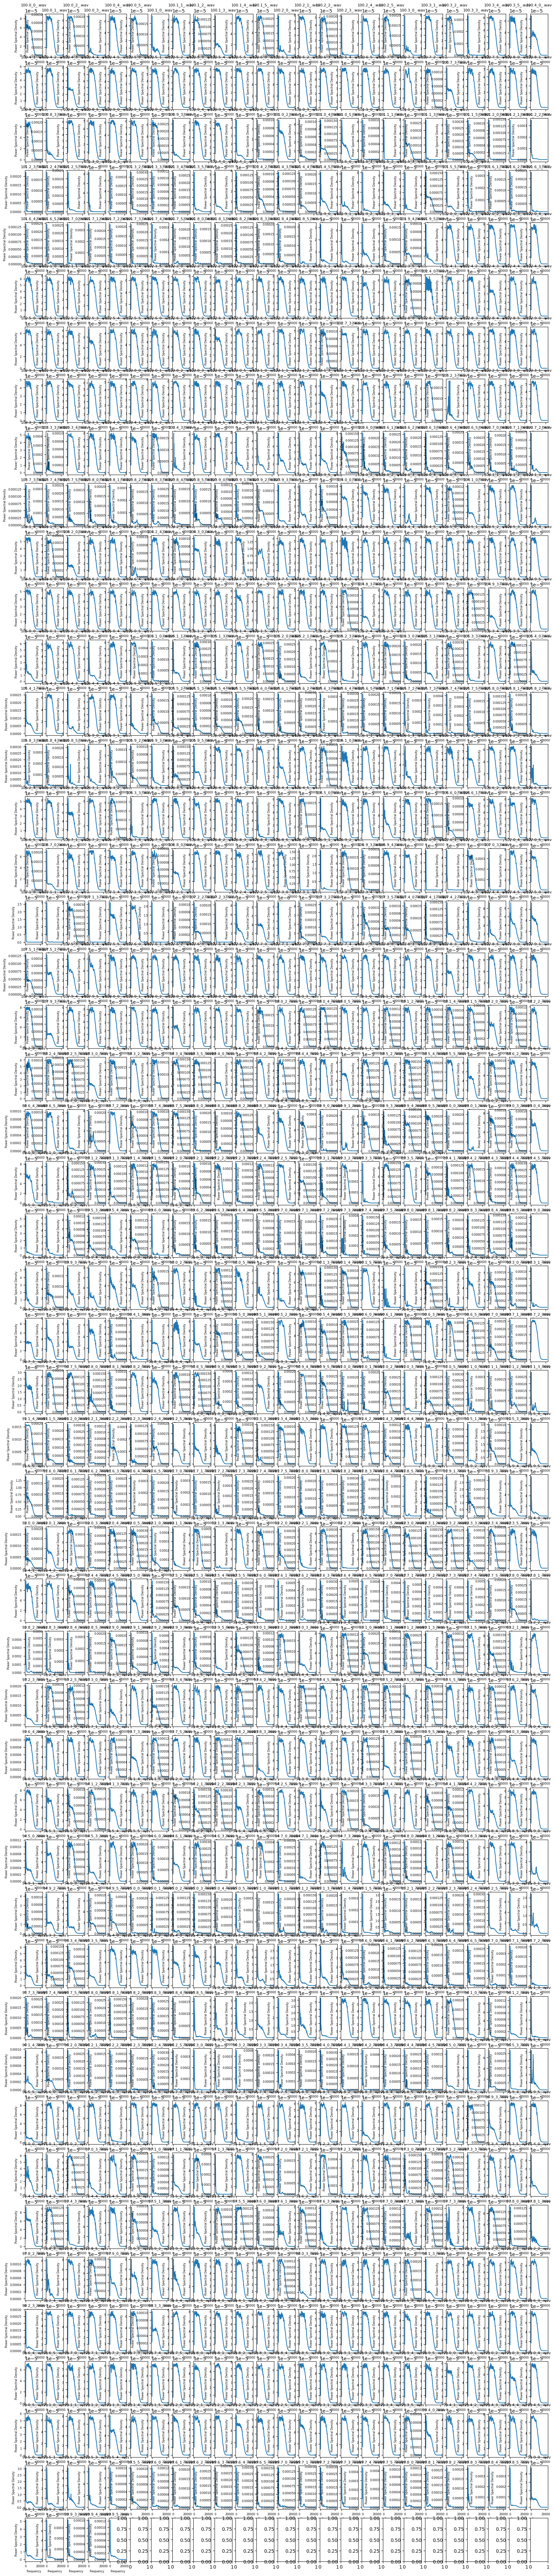

In [3]:
import matplotlib.pyplot as plt
# Número de columnas y filas para el plot
num_columns = 25
num_rows = int(np.ceil(len(spectra_array) / num_columns))

# Crear una figura grande con subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 2))

# Asegurarse de que axes es un array 2D
axes = axes.flatten()

# Plotear cada espectro de potencia en su subplot correspondiente
for i, spectrum in enumerate(spectra_array):
    ax = axes[i]
    ax.plot(spectrum[1], spectrum[2])
    ax.set_title(spectrum[0], fontsize=8)
    ax.set_xlabel('Frequency', fontsize=6)
    ax.set_ylabel('Power Spectral Density', fontsize=6)
    ax.tick_params(axis='both', which='major', labelsize=6)

# Ajustar el layout para que no se solapen los subplots
plt.tight_layout()
plt.show()